In [1]:
import os
import mat73
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
def read_Bayesian_output(file_path: str) -> dict:
    """Read HLM output file.

    Args:
        Filepath to where the Bayesian output is found

    Returns:
        dict: Dictionary containing the HLM samples.

    """
    mat = mat73.loadmat(file_path)
    return mat["samples"]

# Read in data

In [34]:
data_dir = "./data/1_pilot"
bayesian_samples_ind = read_Bayesian_output(
            os.path.join(data_dir, "Bayesian_JAGS_parameter_estimation_no_pooling.mat")
        )

eta_i = bayesian_samples_ind["eta"]
print("Individual eta from no pooling has shape: ",np.shape(eta_i))


bayesian_samples_part = read_Bayesian_output(
            os.path.join(data_dir, "Bayesian_JAGS_parameter_estimation_pooling_individuals.mat")
        )
eta_g_part = bayesian_samples_part["eta_g"]
eta_i_part = bayesian_samples_part["eta"]
eta_part_mu = bayesian_samples_part["mu_eta"]
eta_part_sigma = bayesian_samples_part["sigma_eta"]
eta_part_tau = bayesian_samples_part["tau_eta"]

print("Group eta from partial pooling has shape: ",np.shape(eta_g_part))
print("Individual eta from partial pooling has shape: ",np.shape(eta_i_part))
print("Mu eta from partial pooling has shape: ",np.shape(eta_part_mu))
print("Sigma eta from partial pooling has shape: ",np.shape(eta_part_sigma))

bayesian_samples_group = read_Bayesian_output(
            os.path.join(data_dir, "Bayesian_JAGS_parameter_estimation_group.mat")
            )
eta_g = bayesian_samples_group["eta"]
eta_g_mu = bayesian_samples_group["mu_eta"]
eta_g_sigma = bayesian_samples_group["sigma_eta"]
print("Group eta from full pooling has shape: ",np.shape(eta_g))
print("Mu eta from full pooling has shape: ",np.shape(eta_g))
print("Sigma eta from full pooling has shape: ",np.shape(eta_g))

bayesian_samples_group2 = read_Bayesian_output(
            os.path.join(data_dir, "Bayesian_JAGS_parameter_estimation_group.mat")
            )
eta_g2 = bayesian_samples_group2["eta"]
eta_g_mu2 = bayesian_samples_group2["mu_eta"]
eta_g_sigma2 = bayesian_samples_group2["sigma_eta"]
print("Group eta from full pooling has shape: ",np.shape(eta_g2))
print("Mu eta from full pooling has shape: ",np.shape(eta_g2))
print("Sigma eta from full pooling has shape: ",np.shape(eta_g2))


cmap = plt.get_cmap("tab10")
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
legend_dict={0: "Additive", 1: "Multiplicative"}

Individual eta from no pooling has shape:  (4, 5000, 11, 2)
Group eta from partial pooling has shape:  (4, 5000, 2)
Individual eta from partial pooling has shape:  (4, 5000, 11, 2)
Mu eta from partial pooling has shape:  (4, 5000, 2)
Sigma eta from partial pooling has shape:  (4, 5000, 2)
Group eta from full pooling has shape:  (4, 5000, 2)
Mu eta from full pooling has shape:  (4, 5000, 2)
Sigma eta from full pooling has shape:  (4, 5000, 2)
Group eta from full pooling has shape:  (4, 5000, 2)
Mu eta from full pooling has shape:  (4, 5000, 2)
Sigma eta from full pooling has shape:  (4, 5000, 2)


# Plot group level for:
- partial pooling implementation 
- Full pooling implementation

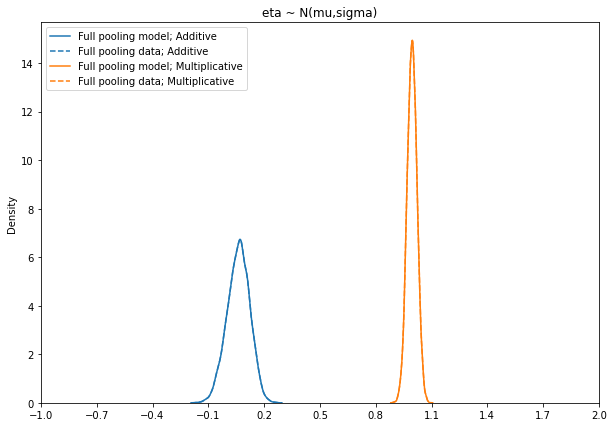

In [37]:
#group

fix, ax = plt.subplots(1,1,figsize = (10,7))
ax.set_title('eta ~ N(mu,sigma)')
for c in range(2):
    #sns.kdeplot(eta_g_part[:,:,c].flatten(),color = colors[c], linestyle = '-', 
    #            ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
    sns.kdeplot(eta_g[:,:,c].flatten(),color = colors[c], linestyle = '-', 
                ax = ax, label = f"Full pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
    sns.kdeplot(eta_g2[:,:,c].flatten(),color = colors[c], linestyle = '--', 
                ax = ax, label = f"Full pooling data; {legend_dict[c]}", fill = False, alpha = 0.5)


    ax.legend()
ax.set_xlim([-1,1])
ax.set_xticks(np.linspace(-1, 2, 11))
ax.set_yticks=[],
plt.show()

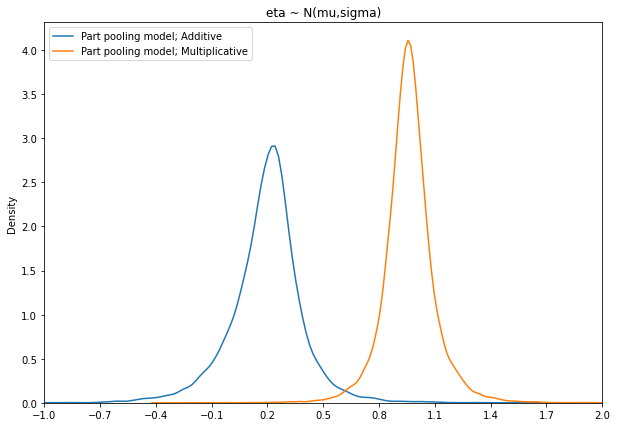

In [38]:
#group

fix, ax = plt.subplots(1,1,figsize = (10,7))
ax.set_title('eta ~ N(mu,sigma)')
for c in range(2):
    sns.kdeplot(eta_g_part[:,:,c].flatten(),color = colors[c], linestyle = '-', 
                ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)

ax.legend()
ax.set_xlim([-1,1])
ax.set_xticks(np.linspace(-1, 2, 11))
ax.set_yticks=[],
plt.show()

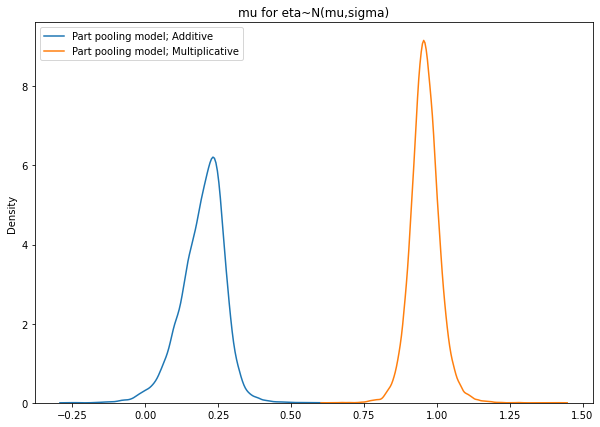

In [22]:
#group

fix, ax = plt.subplots(1,1,figsize = (10,7))
ax.set_title('mu for eta~N(mu,sigma)')
for c in range(2):
    sns.kdeplot(eta_part_mu[:,:,c].flatten(),color = colors[c], linestyle = '-', 
                ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
    #sns.kdeplot(eta_g_mu[:,:,c].flatten(),color = colors[c], linestyle = '--', 
    #           ax = ax, label = f"Full pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
ax.legend()
#ax.set_xlim([-1,1])
#ax.set_xticks(np.linspace(-1, 2, 11))
ax.set_yticks=[],
plt.show()

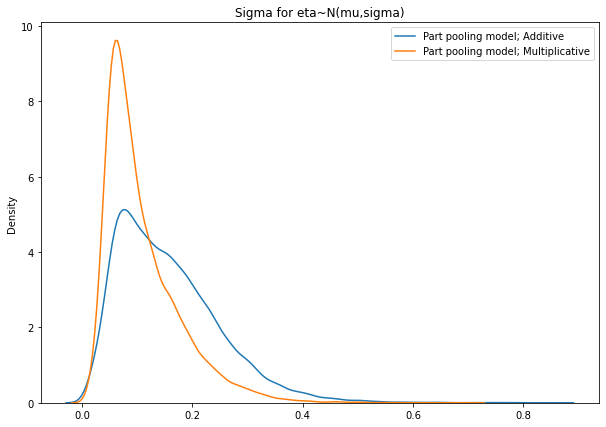

In [27]:
#group

fix, ax = plt.subplots(1,1,figsize = (10,7))
ax.set_title('Sigma for eta~N(mu,sigma)')
for c in range(2):
    sns.kdeplot(eta_part_sigma[:,:,c].flatten(),color = colors[c], linestyle = '-', 
                ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
    #sns.kdeplot(eta_g_sigma[:,:,c].flatten(),color = colors[c], linestyle = '--', 
    #           ax = ax, label = f"Full pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
ax.legend()
#ax.set_xlim([-1,1])
#ax.set_xticks(np.linspace(-1, 2, 11))
ax.set_yticks=[],
plt.show()

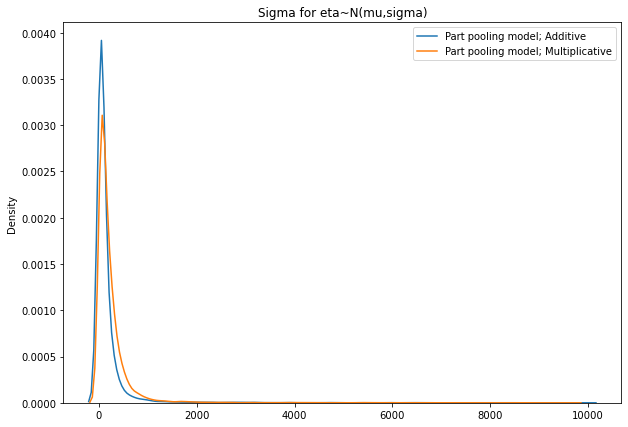

In [30]:
#group

fix, ax = plt.subplots(1,1,figsize = (10,7))
ax.set_title('Sigma for eta~N(mu,sigma)')
for c in range(2):
    sns.kdeplot(eta_part_tau[:,:,c].flatten(),color = colors[c], linestyle = '-', 
                ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
    #sns.kdeplot(eta_g_sigma[:,:,c].flatten(),color = colors[c], linestyle = '--', 
    #           ax = ax, label = f"Full pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
ax.legend()
#ax.set_xlim([-1,1])
#ax.set_xticks(np.linspace(-1, 2, 11))
ax.set_yticks=[],
plt.show()

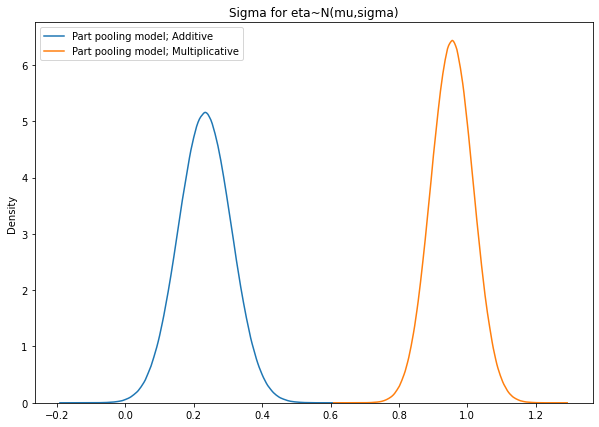

In [33]:
#group



fix, ax = plt.subplots(1,1,figsize = (10,7))
ax.set_title('Sigma for eta~N(mu,sigma)')
for c in range(2):
    kde = sm.nonparametric.KDEUnivariate(eta_part_mu[:,:,c].flatten()).fit()
    mu_eta = kde.support[np.argmax(kde.density)]
    kde = sm.nonparametric.KDEUnivariate(eta_part_sigma[:,:,c].flatten()).fit()
    sigma_eta = kde.support[np.argmax(kde.density)]
    sns.kdeplot(np.random.normal(mu_eta,sigma_eta,10000000),color = colors[c], linestyle = '-', 
                ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
    #sns.kdeplot(eta_g_sigma[:,:,c].flatten(),color = colors[c], linestyle = '--', 
    #           ax = ax, label = f"Full pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
ax.legend()
#ax.set_xlim([-1,1])
#ax.set_xticks(np.linspace(-1, 2, 11))
ax.set_yticks=[],
plt.show()

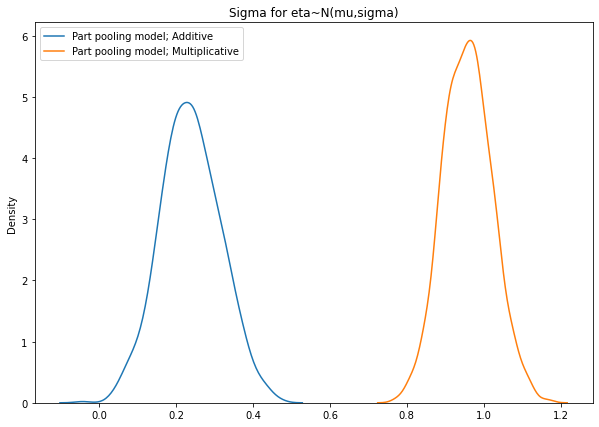

In [32]:
#group



fix, ax = plt.subplots(1,1,figsize = (10,7))
ax.set_title('Sigma for eta~N(mu,sigma)')
for c in range(2):
    kde = sm.nonparametric.KDEUnivariate(eta_part_mu[:,:,c].flatten()).fit()
    mu_eta = kde.support[np.argmax(kde.density)]
    kde = sm.nonparametric.KDEUnivariate(1/np.sqrt(eta_part_tau[:,:,c]).flatten()).fit()
    sigma_eta = kde.support[np.argmax(kde.density)]
    sns.kdeplot(np.random.normal(mu_eta,sigma_eta,1000),color = colors[c], linestyle = '-', 
                ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
    #sns.kdeplot(eta_g_sigma[:,:,c].flatten(),color = colors[c], linestyle = '--', 
    #           ax = ax, label = f"Full pooling model; {legend_dict[c]}", fill = False, alpha = 0.5)
ax.legend()
#ax.set_xlim([-1,1])
#ax.set_xticks(np.linspace(-1, 2, 11))
ax.set_yticks=[],
plt.show()

# Individual data (2d plot) for:
- Partial pooling method
- No pooling method

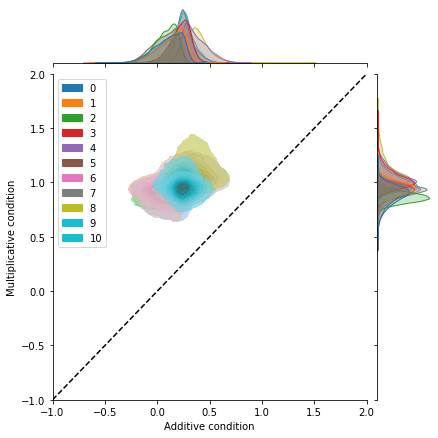

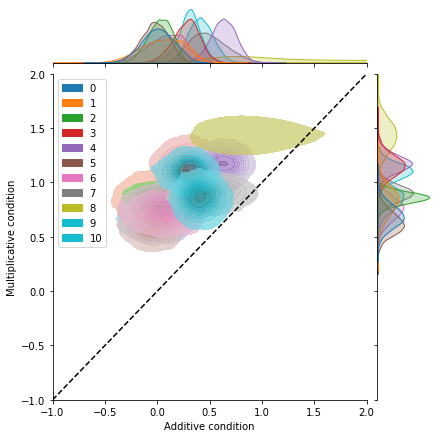

In [16]:
eta_i_part_t = eta_i_part.transpose((2, 0, 1, 3))
eta_i_part_t_r = np.reshape(eta_i_part_t, (11 * 5000 * 4, 2))

# Create joint plot
h1 = sns.jointplot(
        data=eta_i_part_t_r,
        x=eta_i_part_t_r[:, 0],
        y=eta_i_part_t_r[:, 1],
        hue=np.repeat(np.arange(11), 4 * 5000),
        kind="kde",
        alpha=0.7,
        fill=True,
        palette = colors,
        xlim = [-1,2],
        ylim = [-1,2]
    )

# Set x and y labels
h1.set_axis_labels("Additive condition", "Multiplicative condition")
sns.lineplot(x=[-1, 2], y=[-1, 2], color='black', linestyle='--', ax=h1.ax_joint)


eta_i_t = eta_i.transpose((2, 0, 1, 3))
eta_i_t_r = np.reshape(eta_i_t, (11 * 5000 * 4, 2))

# Create joint plot
h2 = sns.jointplot(
        data=eta_i_t_r,
        x=eta_i_t_r[:, 0],
        y=eta_i_t_r[:, 1],
        hue=np.repeat(np.arange(11), 4 * 5000),
        kind="kde",
        alpha=0.7,
        fill=True,
        palette = colors,
        xlim = [-1,2],
        ylim = [-1,2]
    )

# Set x and y labels
h2.set_axis_labels("Additive condition", "Multiplicative condition")
sns.lineplot(x=[-1, 2], y=[-1, 2], color='black', linestyle='--', ax=h2.ax_joint)


# Show plot
plt.show()

# Individual data for:
- Partial pooling method
- No pooling method

In [ ]:
for i in range(11):
    fix, ax = plt.subplots(1,1,figsize = (10,7))
    for c in range(2):
        sns.kdeplot(eta_i_part[:,:,i,c].flatten(),color = colors[c], linestyle = '-', 
                    ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False)
        sns.kdeplot(eta_i[:,:,i,c].flatten(),color = colors[c], linestyle = '--', 
                    ax = ax, label = f"No pooling model; {legend_dict[c]}", fill = False)
    ax.set_title(f'Participant {i}')
    ax.legend(loc = 'upper left')
    ax.set_xlim([-1,2])
    ax.set_xticks(np.linspace(-1, 2, 7))
    ax.set_yticks=[],
plt.show()

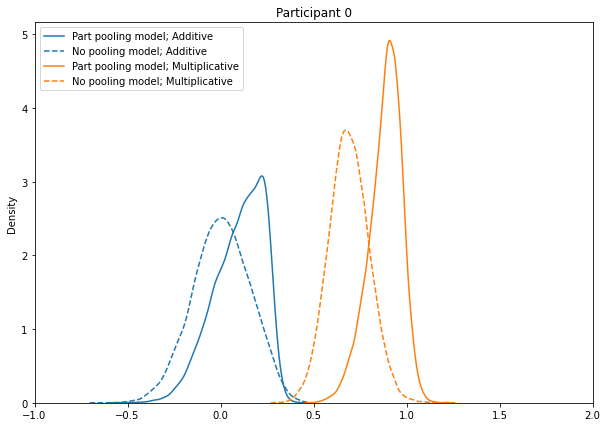

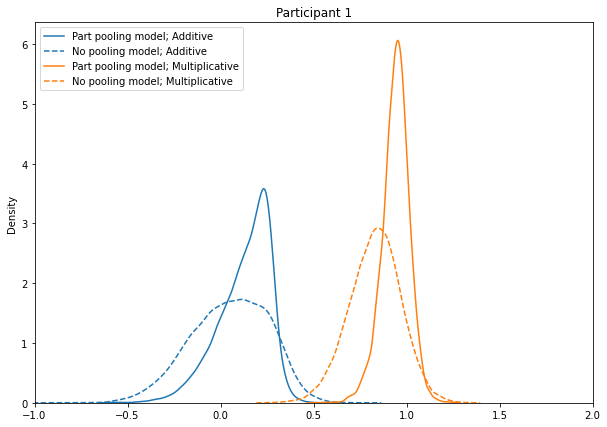

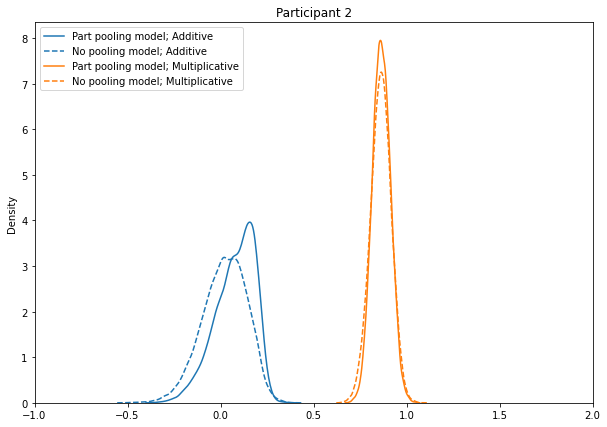

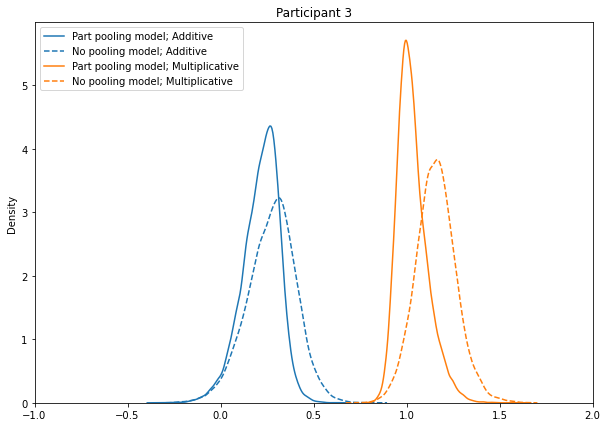

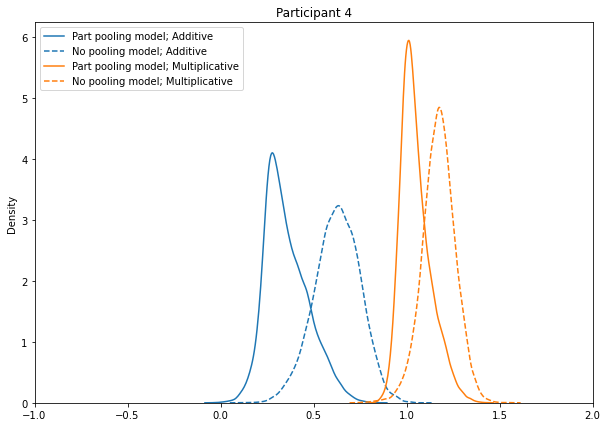

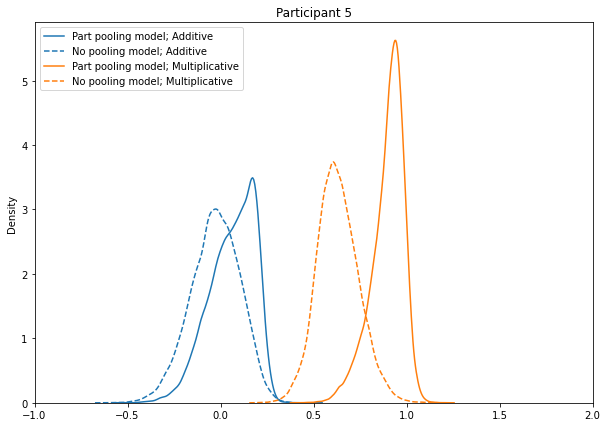

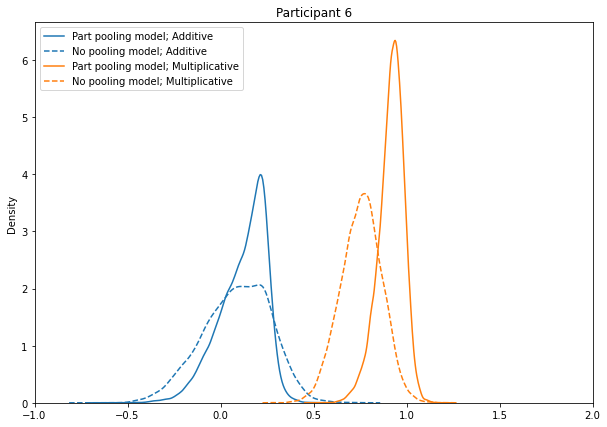

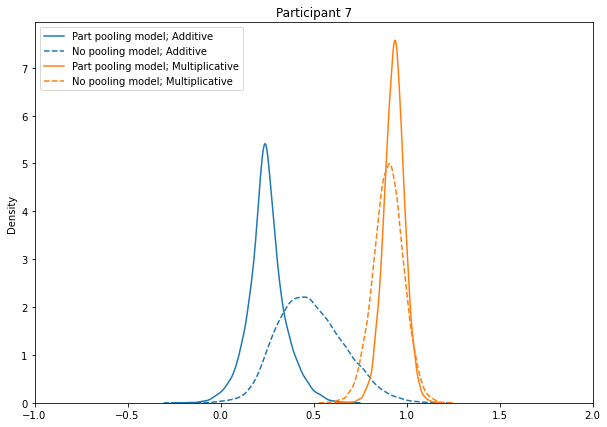

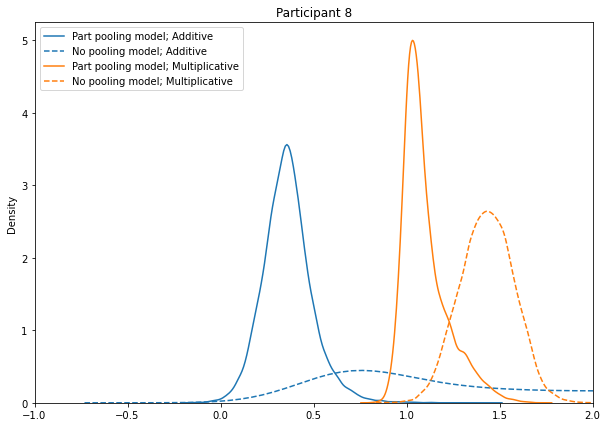

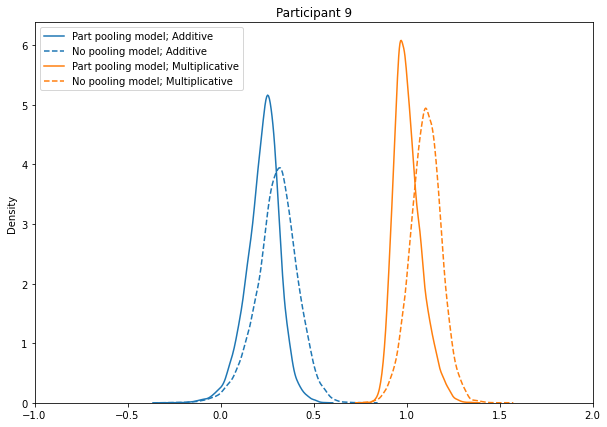

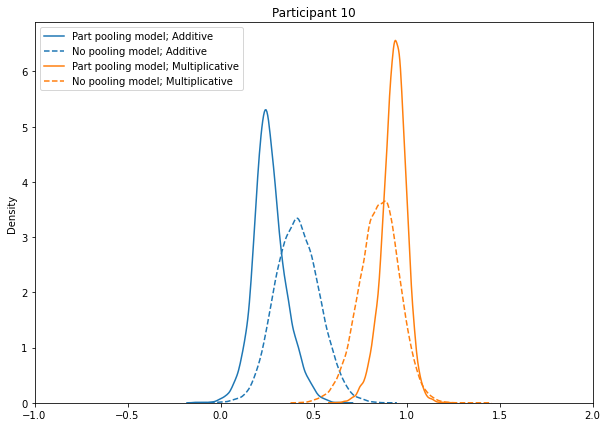

In [19]:
for i in range(11):
    fix, ax = plt.subplots(1,1,figsize = (10,7))
    for c in range(2):
        sns.kdeplot(eta_i_part[:,:,i,c].flatten(),color = colors[c], linestyle = '-', 
                    ax = ax, label = f"Part pooling model; {legend_dict[c]}", fill = False)
        sns.kdeplot(eta_i[:,:,i,c].flatten(),color = colors[c], linestyle = '--', 
                    ax = ax, label = f"No pooling model; {legend_dict[c]}", fill = False)
    ax.set_title(f'Participant {i}')
    ax.legend(loc = 'upper left')
    ax.set_xlim([-1,2])
    ax.set_xticks(np.linspace(-1, 2, 7))
    ax.set_yticks=[],
plt.show()